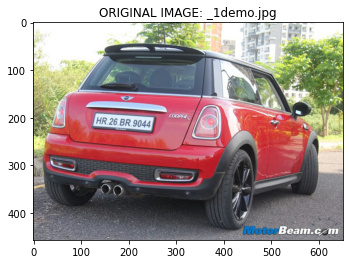

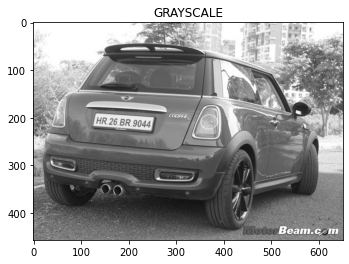

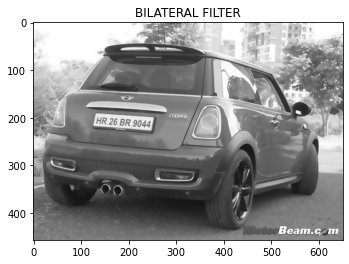

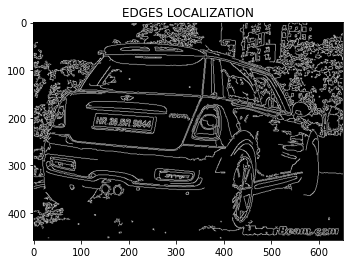

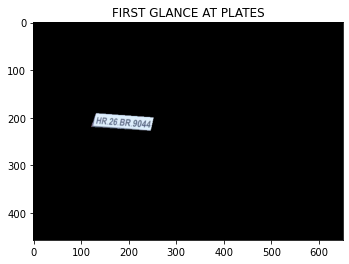

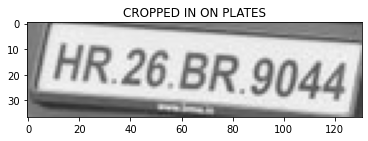

16
The license plates for _1demo.jpg are: HR 26.BR 9044


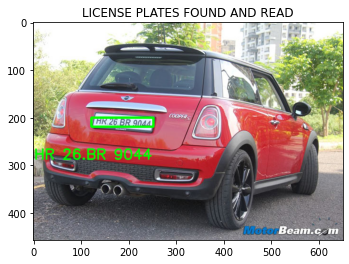

In [1]:
###############################################################################################
# Final Project for CS 5190: Computer Vision
# Present any Github project related to computer vision with working code
#
# Using https://github.com/nicknochnack/ANPRwithPython/blob/main/ANPR%20-%20Tutorial.ipynb
# https://github.com/MauryaRitesh/OCR-Python/blob/master/OCR_Tesseract_Python.ipynb
#
# using the following versions:
# OpenCV 4.5.4.60
# matplotlib 3.5.1
# imutils 0.5.4
# pytesseract 0.3.9
###############################################################################################
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract

##### STEP 1 READ IN AN IMAGE AND CONVERT IT TO GRAYSCALE #####
# READ IN IMAGE

input_file = '_1demo.jpg'
img = cv2.imread(input_file)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

final_result = img_RGB.copy()
plt.title('ORIGINAL IMAGE: _1demo.jpg')
plt.imshow(img_RGB)
plt.show()

#CONVET TO GRAYSCACLE
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title('GRAYSCALE')
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

##### STEP 2 APPLY FILTER AND FIND EDGES #####
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection

plt.title('BILATERAL FILTER')
plt.imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
plt.show()

plt.title('EDGES LOCALIZATION')
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

##### STEP 3 FIND CONTOURS AND APPLY MASK #####
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

location

mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

plt.title('FIRST GLANCE AT PLATES')
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

plt.title('CROPPED IN ON PLATES')
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()

##### STEP 4 READ THE CHARACTERS #####
def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path)

    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite("removed_noise.png", img)

    # Write the image after applying opencv
    cv2.imwrite(img_path, img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(img_path)

    return result

cv2.imwrite("readCharactersFromImage.jpg", cropped_image)
plates = get_string("readCharactersFromImage.jpg")
print (len(plates))
plate_info = plates[1:(len(plates)-2)]
print ("The license plates for", input_file, "are:", plate_info)

##### STEP 5 RENDER RESULT #####
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=plate_info, org=(approx[0][0][0]-120, approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)

plt.title("LICENSE PLATES FOUND AND READ")
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.show()

##############################################
